<a href="https://colab.research.google.com/github/supragyabajpai/supragya_bajpai/blob/master/position_Salary(using_SVR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
##importing the dataset from the local drive
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset= pd.read_csv('Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
Y=dataset.iloc[:,2]
print(dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
ERROR! Session/line number was not unique in database. History logging moved to new session 60


In [0]:
#Featur Scaling
from sklearn.preprocessing import StandardScaler
sc_X= StandardScaler()
sc_Y= StandardScaler()
x= sc_X.fit_transform(X)
y = sc_Y.fit_transform(pd.DataFrame(Y))# need to reshape the data to a 2d matrix 


In [30]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)
y_pred= sc_Y.inverse_transform(regressor.predict(sc_X.transform(np.array([[6.5]]))))# one can use any value inplace of 6.5
print(y_pred)

[170370.0204065]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0, 0.5, 'Salaries')

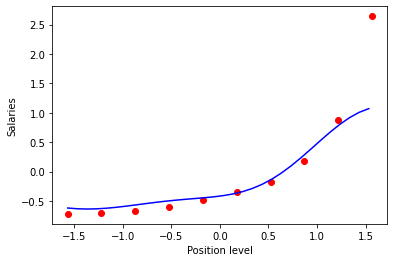

In [31]:
#visualising the SVR model
X_grid=np.arange(min(x),max(x),0.1)#to enhance the curve line 
X_grid=X_grid.reshape((len(X_grid),1))
plt.scatter(x,y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')
plt.xlabel('Position level')
plt.ylabel('Salaries')